# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

# Loading the dataset


In [2]:
df = pd.read_csv(r"C:\Users\afiroz\Downloads\yellow_tripdata_2020-01.csv")

In [3]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [4]:
df.tail(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.0,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.0,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.0,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.0,0.00,0.3,30.22,0.0
6405007,NaN,2020-01-31 22:44:00,2020-01-31 23:06:00,NaN,11.60,NaN,NaN,179,205,NaN,54.56,2.75,0.5,0.0,0.00,0.3,58.11,0.0


# Exploratory Data Analysis

In [5]:
df['payment_type'].value_counts()

payment_type
1.0    4694897
2.0    1593834
3.0      32770
4.0      18065
5.0          1
Name: count, dtype: int64

In [6]:
df.shape

(6405008, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 879.6+ MB


In [8]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [9]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'].dt.total_seconds()/60

In [10]:
df.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333


In [11]:
df = df[['passenger_count','trip_distance','payment_type','fare_amount','duration']]

In [12]:
df.isnull().sum()

passenger_count    65441
trip_distance          0
payment_type       65441
fare_amount            0
duration               0
dtype: int64

In [13]:
(df['passenger_count'].isnull().sum()/len(df))*100

1.021716132126611

In [14]:
df.dropna(inplace=True)

In [15]:
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')

In [16]:
df.shape

(6339567, 5)

In [17]:
# Dropping the Duplicates
df.drop_duplicates(inplace=True)

In [18]:
df['passenger_count'].value_counts(normalize = True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [19]:
df['payment_type'].value_counts(normalize = True)

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

In [20]:
df = df.loc[df['payment_type']< 3]
df = df.loc[(df['passenger_count'] > 0)&(df['passenger_count']<6)]

In [21]:
df.shape

(2780283, 5)

In [22]:
df['payment_type'].replace(to_replace=([1,2]),value=(['card','cash']),inplace=True)

In [23]:
df.describe()

,passenger_count,trip_distance,fare_amount,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,4.536729e+00,1.780567e+01,2.415478e+01
std,1.176652e+00,4.895890e+00,1.506997e+01,9.260031e+01
min,1.000000e+00,-2.218000e+01,-5.000000e+02,-2.770367e+03
25%,1.000000e+00,1.500000e+00,9.000000e+00,9.883333e+00
50%,1.000000e+00,2.730000e+00,1.300000e+01,1.573333e+01
75%,2.000000e+00,5.470000e+00,2.100000e+01,2.336667e+01
max,5.000000e+00,2.628800e+02,4.265000e+03,8.525117e+03


In [24]:
df = df[df['fare_amount']>0]
df= df[df['trip_distance']>0]
df= df[df['duration']>0]

In [25]:
df.describe()

,passenger_count,trip_distance,fare_amount,duration
count,2.748932e+06,2.748932e+06,2.748932e+06,2.748932e+06
mean,1.738151e+00,4.583313e+00,1.766835e+01,2.418261e+01
std,1.179440e+00,4.897806e+00,1.447531e+01,9.272285e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,1.530000e+00,9.000000e+00,9.950000e+00
50%,1.000000e+00,2.770000e+00,1.300000e+01,1.575000e+01
75%,2.000000e+00,5.500000e+00,2.100000e+01,2.333333e+01
max,5.000000e+00,2.628800e+02,4.265000e+03,8.525117e+03


In [26]:
df.shape

(2748932, 5)

# Identifying and dropping the null values through Z-Score

<Axes: xlabel='fare_amount'>

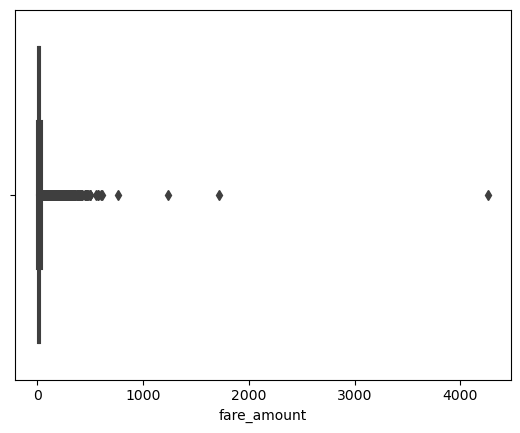

In [27]:
sns.boxplot(df['fare_amount'])

In [28]:
for column in df[['fare_amount','trip_distance','duration']]:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1-(1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    df = df.loc[(df[column] >=lower_bound) & (df[column]<=upper_bound)]


In [29]:
df.shape

(2297908, 5)

# Visualizing the Data

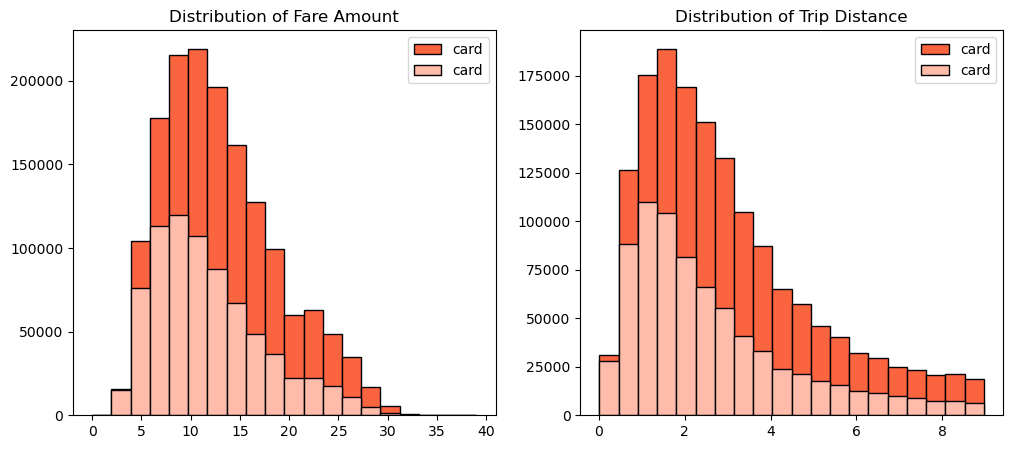

In [30]:
# Creating a Histogram
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.title("Distribution of Fare Amount")
plt.hist(df[df['payment_type']=='card']['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color='#FA643F',label='card')
plt.hist(df[df['payment_type']=='cash']['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color='#FFBCAB',label='card')
plt.legend()

plt.subplot(1,2,2)
plt.title("Distribution of Trip Distance")
plt.hist(df[df['payment_type']=='card']['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color='#FA643F',label='card')
plt.hist(df[df['payment_type']=='cash']['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color='#FFBCAB',label='card')
plt.legend()
plt.show()


In [31]:
df.groupby(by='payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
card           13.112493  5.849281      2.992237  1.99274
cash           11.758005  5.613038      2.602207  1.91372

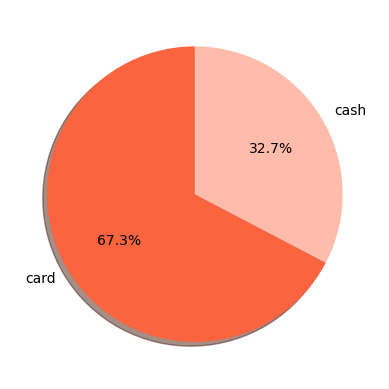

In [32]:
# Creating a Pie Chart
plt.pie(df['payment_type'].value_counts(normalize=True),labels= df['payment_type'].value_counts().index,startangle=90,
        shadow=True,autopct='%1.1f%%',colors = ['#FA643F','#FFBCAB'])
plt.show()

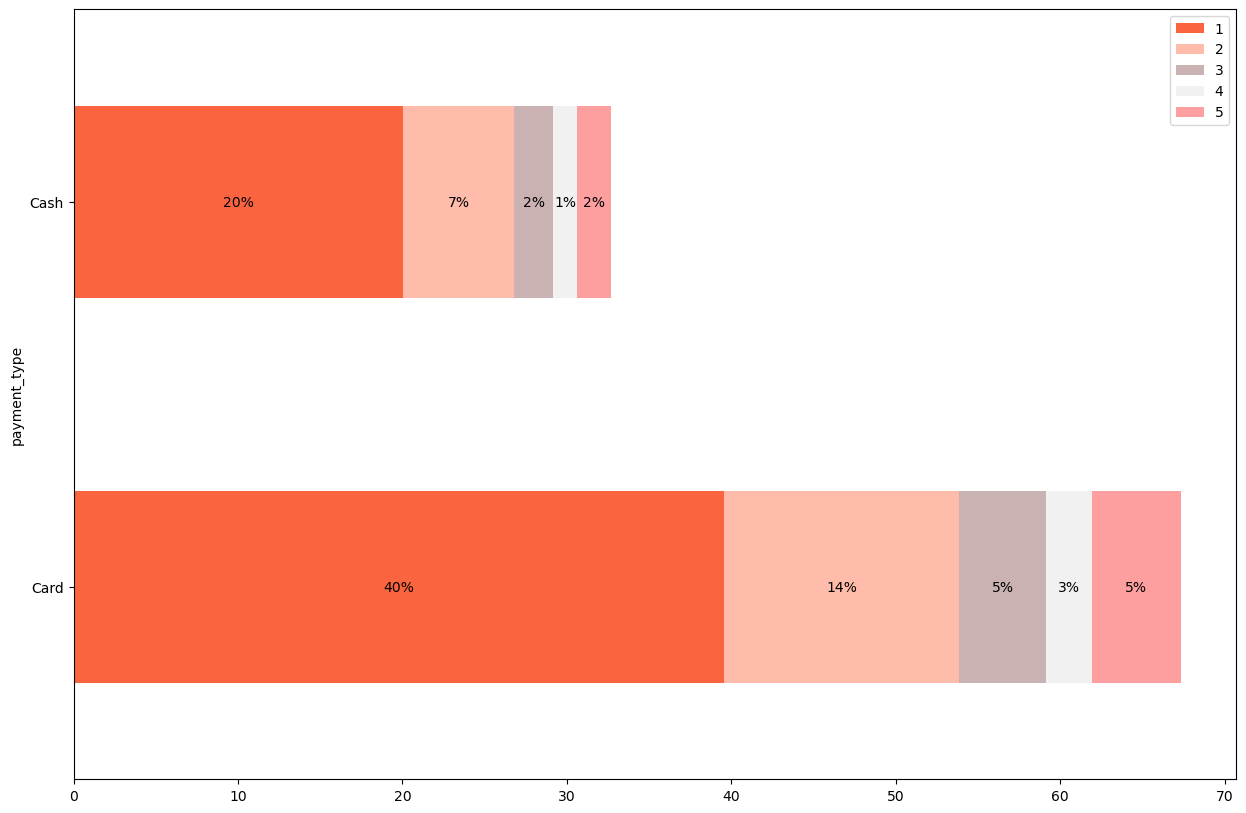

In [33]:
# Creating a Bar Chart
passenger_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count':'count'},inplace=True)
passenger_count.reset_index(inplace = True)
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100
df1 = pd.DataFrame(columns = ['payment_type', 1, 2, 3, 4, 5])  
df1['payment_type'] = ['Card', 'Cash']  
df1.iloc[0, 1:] = passenger_count.iloc[0:5, -1]  
df1.iloc[1, 1:] = passenger_count.iloc[5:, -1]  
fig, ax = plt.subplots(figsize = (15,10))  
df1.plot(x = 'payment_type', kind = 'barh', stacked = True, ax = ax, color = ['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'])  
# Add percentage text  
for p in ax.patches:  
    width = p.get_width()  
    height = p.get_height()  
    x, y = p.get_xy()  
    ax.text(x + width / 2,  
            y + height / 2,  
            '{:.0f}%'.format(width),  
            horizontalalignment='center',  
            verticalalignment='center')

## Hypothesis Testing

Null hypothesis: There is no difference in average fare between customers who use credit cards and            customers who use cash.

Alternative hypothesis: There is a difference in average fare between customers who use credit cards          and customers who use cash.



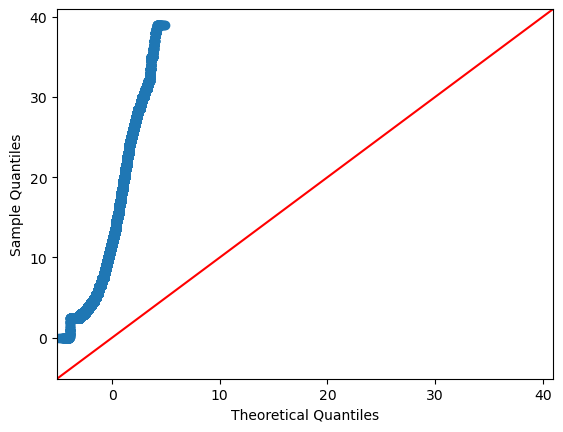

In [34]:
# Cheacking for the normal Normal Distribution of the data
sm.qqplot(df['fare_amount'], line = '45')
plt.show()

#### Since the data is not normally distributed, the dataset is small, and the population standard deviation is unknown, we will use a T-test for hypothesis testing.


In [35]:
# Preparing the data
card_sample_1=df.loc[df['payment_type']=='card']['fare_amount']
cash_sample_2=df.loc[df['payment_type']=='cash']['fare_amount']

In [36]:
t_stats, p_value = st.ttest_ind(a = card_sample_1, b = cash_sample_2, equal_var = False)  
print('T statistic', t_stats, 'p-value', p_value)

T statistic 169.2111527245052 p-value 0.0


#### With a T-statistic of 165.5 and a P-value of less than 0.05, we reject the null hypothesis, suggesting that there is indeed a significant difference in average fare between the two payment methods.
